In [1]:
import numpy  as np
import pandas as pd
import itertools as it
import os, sys
import gzip
import re

import hicstraw
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
import pyBigWig

In [2]:
FD_DAT="/data/reddylab/Kuei/repo/Proj_CombEffect_ENCODE_FCC/data"
FD_DAT_OLD="/data/reddylab/Kuei/work/proj_combeffect_encode_fcc/source"
FD_RES_OLD="/data/reddylab/Kuei/work/proj_combeffect_encode_fcc/results_v4"

In [3]:
!ls /data/reddylab/Kuei/repo/Proj_CombEffect_ENCODE_FCC/data/external/hic_intact_K562_deep

inter.hic  localizedList_primary_10.bedpe


In [25]:
!ls /data/reddylab/Kuei/work/trackhub/proj_combeffect_encode_fcc

track_annotation      track_crispri_hcrff  track_hic_loop
track_crispri_growth  track_encode_e2g	   track_starrmpra


In [4]:
txt_fdiry = os.path.join(FD_DAT, "external", "hic_intact_K562_deep")
txt_fname = "inter.hic"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

hic   = hicstraw.HiCFile(txt_fpath)

print(hic)
print(hic.getGenomeID())
print(hic.getResolutions())

hg38
[2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10, 1]


In [5]:
txt_fdiry = os.path.join(FD_RES_OLD, "region", "annotation_crispri_hcrff")
txt_fname = "description.tsv"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

dat = pd.read_csv(txt_fpath, sep="\t")
vec = dat.Name
vec_txt_cnames = vec

In [6]:
txt_fdiry = os.path.join(FD_RES_OLD, "region", "annotation_crispri_hcrff")
txt_fname = "crispri_hcrff.casa.bed.gz"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

dat = pd.read_csv(txt_fpath, sep="\t", names=vec_txt_cnames)
dat

,Chrom,Start,End,Name,Score,Strand,Gene_Symbol,Gene_Ensembl,Assay_Type,Assay_Label
0,chr11,5248847,5249047,chr11:5248847-5249047,1.068624,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
1,chr11,5248847,5249047,chr11:5248847-5249047,0.935770,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2
2,chr11,5249847,5250847,chr11:5249847-5250847,1.890890,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
3,chr11,5249847,5250847,chr11:5249847-5250847,1.922956,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2
4,chr11,5253147,5253547,chr11:5253147-5253547,1.330342,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
...,...,...,...,...,...,...,...,...,...,...
108,chrX,48786097,48786997,chrX:48786097-48786997,3.708137,.,GATA1,ENSG00000102145,CRISPRi-HCRFF,CRISPRi-HCRFF:GATA1
109,chrX,48786297,48786997,chrX:48786297-48786997,-1.425316,.,HDAC6,ENSG00000094631,CRISPRi-HCRFF,CRISPRi-HCRFF:HDAC6
110,chrX,48800197,48801297,chrX:48800197-48801297,2.398983,.,GATA1,ENSG00000102145,CRISPRi-HCRFF,CRISPRi-HCRFF:GATA1
111,chrX,48800297,48801097,chrX:48800297-48801097,1.396662,.,HDAC6,ENSG00000094631,CRISPRi-HCRFF,CRISPRi-HCRFF:HDAC6


In [7]:
dat.loc[dat.Gene_Symbol == "MYC"]

,Chrom,Start,End,Name,Score,Strand,Gene_Symbol,Gene_Ensembl,Assay_Type,Assay_Label
89,chr8,127735369,127736269,chr8:127735369-127736269,0.390329,.,MYC,ENSG00000136997,CRISPRi-HCRFF,CRISPRi-HCRFF:MYC
91,chr8,127794569,127795269,chr8:127794569-127795269,-0.505005,.,MYC,ENSG00000136997,CRISPRi-HCRFF,CRISPRi-HCRFF:MYC
92,chr8,127898369,127899769,chr8:127898369-127899769,0.460155,.,MYC,ENSG00000136997,CRISPRi-HCRFF,CRISPRi-HCRFF:MYC
93,chr8,127959469,127961769,chr8:127959469-127961769,1.194111,.,MYC,ENSG00000136997,CRISPRi-HCRFF,CRISPRi-HCRFF:MYC
96,chr8,128044769,128045569,chr8:128044769-128045569,0.503891,.,MYC,ENSG00000136997,CRISPRi-HCRFF,CRISPRi-HCRFF:MYC


In [12]:
txt_normalization = "RU"
num_resolution    = 2000
txt_chrom         = "chr8"

matrix_object = hic.getMatrixZoomData(
    txt_chrom, 
    txt_chrom, 
    "o", #"oe", 
    txt_normalization, 
    "BP", 
    num_resolution)

```
chr8:127,700,000-128,100,000
```

In [13]:
num_start1 =  127_700_000
num_end1   =  128_100_000

num_start2 =  127_700_000
num_end2   =  128_100_000

matrix_numpy = matrix_object.getRecordsAsMatrix(
    int(num_start1),
    int(num_end1),
    int(num_start2),
    int(num_end2)
)

In [14]:
REDMAP = LinearSegmentedColormap.from_list("bright_red", [(1,1,1),(1,0,0)])
# helper function for plotting
def plot_hic_map(dense_matrix, maxcolor):
    plt.matshow(dense_matrix, cmap=REDMAP, vmin=0, vmax=maxcolor)
    plt.show()

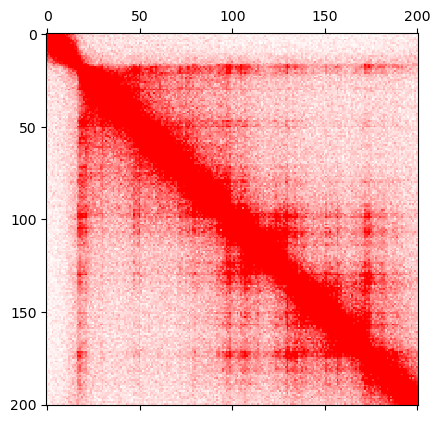

In [15]:
plot_hic_map(matrix_numpy, 30)

```
Experiment summary for ENCSR000EHF
Assay:  ChIP-seq (TF ChIP-seq)
Targe:   POLR2AphosphoS2
https://www.encodeproject.org/files/ENCFF914ZIB/@@download/ENCFF914ZIB.bigW

Experiment summary for ENCSR388QZF
Assay:  ChIP-seq (TF ChIP-seq)
Target:  POLR2A
https://www.encodeproject.org/files/ENCFF914WIS/@@download/ENCFF914WIS.bigWig
```

In [27]:
txt_fdiry = os.path.join(FD_DAT, "external", "encode_chipseq_tf_subset")
txt_fname = "K562.hg38.ENCSR388QZF.ENCFF914WIS.POLR2A.bw"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

In [21]:
bw = pyBigWig.open("https://www.encodeproject.org/files/ENCFF662QFK/@@download/ENCFF662QFK.bigWig")

[urlOpen] Couldn't open https://www.encodeproject.org/files/ENCFF662QFK/@@download/ENCFF662QFK.bigWig for reading
[urlOpen] Couldn't open https://www.encodeproject.org/files/ENCFF662QFK/@@download/ENCFF662QFK.bigWig for reading
[pyBwOpen] bw is NULL!


RuntimeError: Received an error during file opening!

In [32]:
obj_bwig_pol2 = pyBigWig.open(txt_fpath)

In [33]:
obj_bwig_pol2

In [34]:
matrix_numpy.shape

(201, 201)

In [35]:
num_row, num_col = matrix_numpy.shape

In [38]:
obj = obj_bwig_pol2
vec = obj.stats(txt_chrom, num_start1, num_end1, type="mean", nBins=num_row)

vec_bwig_pol2 = vec
type(vec)

list

In [39]:
len(vec)

201

In [40]:
def plot_2dhic_1dtrack_map(dense_matrix, signal, vmin, vmax, cmap):
    ###
    d2 = dense_matrix # np.log(dense_matrix)
    d2[np.isnan(d2)] = 0
    d2[np.isinf(d2)] = 0

    ###
    fig = plt.figure()
    fig.set_figheight(12)
    fig.set_figwidth(8)
    spec = gridspec.GridSpec(
        ncols=1, 
        nrows=2,
        width_ratios=[1], 
        wspace=1,
        hspace=.1, 
        height_ratios=[16, 30])

    ###
    ax0 = fig.add_subplot(spec[0])
    ax0.plot(np.arange(len(signal)), signal)

    ###
    ax1 = fig.add_subplot(spec[1])
    ax1.matshow(d2, cmap=cmap, vmin=vmin, vmax=vmax)
    
    plt.show()

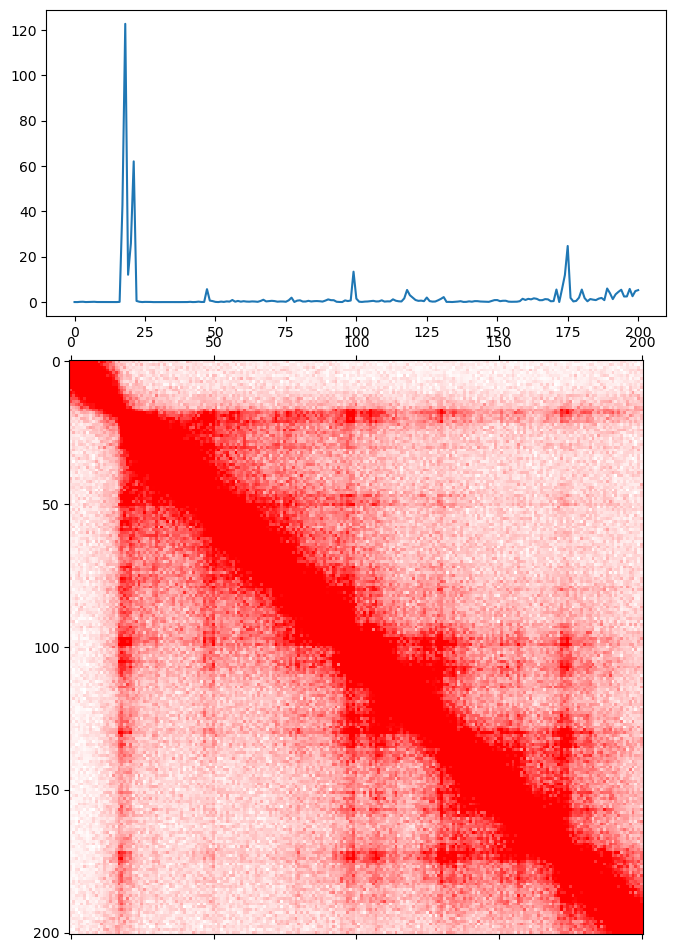

In [43]:
plot_2dhic_1dtrack_map(matrix_numpy, vec_bwig_pol2, 0, 30, REDMAP)